In [1]:
!pip install diffusers
!pip install transformers scipy ftfy accelerate
!pip install compel

In [2]:
import PIL
from PIL import Image

def image_grid(imgs, rows, cols):
    """
    This function takes a list of images and creates a grid of images from them.

    Args:
    imgs (list): List of images to be used in the grid.
    rows (int): Number of rows in the grid.

    Returns:
    grid (Image): The grid of images.
    """

    w, h = imgs[0].size
    grid = Image.new("RGB", size=(cols * w, rows * h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i % cols * w, i // cols * h))
    return grid

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

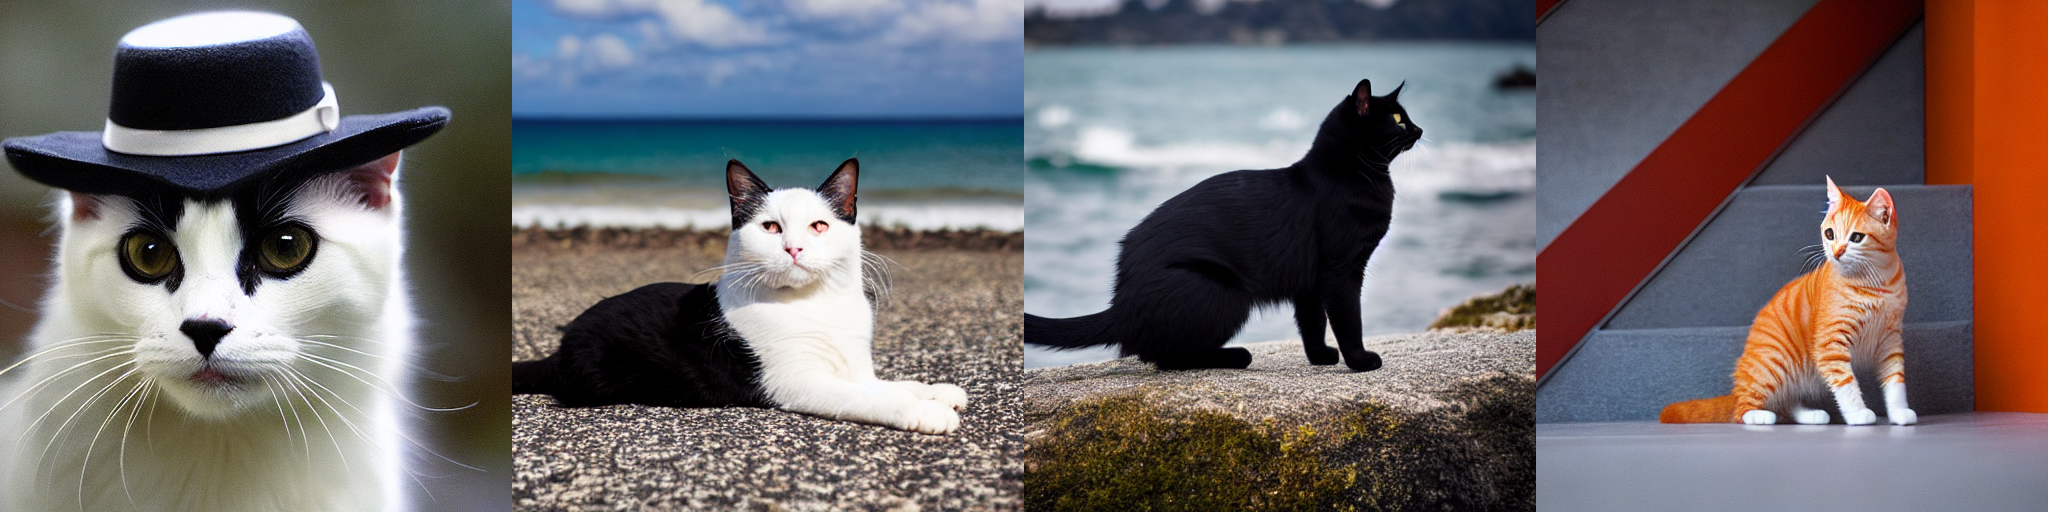

In [3]:
# Bu kodu birden fazla prompt ve negatif prompt istediğimizde kullanabiliriz. Ayrıca prompt weight için de Compel kütüphanesi kullanıldı.

import torch
from diffusers import StableDiffusionPipeline
from compel import Compel

pipeline = StableDiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16, variant="fp16").to("cuda")

#pipeline.enable_sequential_cpu_offload()
generator = torch.Generator(device="cuda").manual_seed(30)

compel_proc = Compel(tokenizer=pipeline.tokenizer, text_encoder=pipeline.text_encoder)

prompt = ["Black white cat with a hat, digital art", "A black and white cat lying down on a coast with sunny weather, realistic", "A black white cat, sea backgorund, realistic", "An orange cat blue-eyed, going up the stairs, modern art"]
negative_prompt = ["ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs, lying down",
                   "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs",
                   "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face++, watermark++, text++, signature++, missing arms, missing legs",
                   "ugly, distorted face, poor details, deformed, big nose, bad art, poorly drawn feet, poorly drawn face, watermark++, text++, signature++, missing arms, missing legs"]

w_prompt = compel_proc(negative_prompt)
images = pipeline(prompt=prompt, negative_prompt_embeds=w_prompt, generator=generator).images

grid = image_grid(images, 1, 4)

#grid.save("result.png")
grid